<a href="https://colab.research.google.com/github/jarom-bradshaw/Ml-Projects/blob/main/jarom_explore_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro: Housing Data
## Documentation

We used the latest edition of pandas, python. I also used seaborn, matplotlib, numpy, and scikit for relecant libraries.

The next two changes that need to be:

Is to remove the top 1 percent and the bottom 1 percent.
Maybe to use census data and make a web scraping to learn.

# Import Data

In [ ]:
!pip install xgboost scikit-learn pandas numpy
!pip install scikit-learn==1.5.2



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import drive
df = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv")

# Data Cleaning


In [ ]:
df.info()
df['price'].describe()
df['price'].head(20)
df['price'].mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   bedrooms       20000 non-null  int64  
 3   bathrooms      20000 non-null  float64
 4   sqft_living    20000 non-null  int64  
 5   sqft_lot       20000 non-null  int64  
 6   floors         20000 non-null  float64
 7   waterfront     20000 non-null  int64  
 8   view           20000 non-null  int64  
 9   condition      20000 non-null  int64  
 10  grade          20000 non-null  int64  
 11  sqft_above     20000 non-null  int64  
 12  sqft_basement  20000 non-null  int64  
 13  yr_built       20000 non-null  int64  
 14  yr_renovated   20000 non-null  int64  
 15  zipcode        20000 non-null  int64  
 16  lat            20000 non-null  float64
 17  long           20000 non-null  float64
 18  sqft_l

539436.71295

In [ ]:
df['zipcode'].value_counts()
df["yr_renovated"]

,yr_renovated
0,0
1,0
2,0
3,0
4,0
...,...
19995,0
19996,0
19997,0
19998,0


In [ ]:
# Drop "id" from both datasets
df.drop(columns=["id"], inplace=True)

# Extract month from the date column
full_date = df["date"]
df['month'] = full_date.str[4:6]

# Drop "date" from both datasets (not useful for prediction)
df.drop(columns=["date"], inplace=True)

# Handle missing values in "yr_renovated"
df["yr_renovated"].fillna(0, inplace=True)

# Drop top and bottom percentile
low = df['price'].quantile(0.01)
high = df['price'].quantile(.99)

# Set the DF to the mid 98%
df = df[(df['price'] >= low) & (df['price'] <= high)]


<ipython-input-25-358cea1a6adb>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["yr_renovated"].fillna(0, inplace=True)


# Data Transforming

In [ ]:
# Cool Columns to make:

# House aGe

# Define feature groups
categorical_features = ["zipcode", "month"]
ordinal_features = ["view", "condition", "grade"]
binary_features = ["waterfront"]
numerical_features = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "sqft_above", "sqft_basement", "lat", "long", "sqft_living15", "sqft_lot15"
]

# One-hot encoder for categorical features
one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# We want min max for ml but not for charts

In [ ]:
# MinMax Scaler for numerical features
scaler = MinMaxScaler()

# Column Transformer (Apply transformations)
preprocessor = ColumnTransformer([
    ("num", scaler, numerical_features),
    ("cat", one_hot_encoder, categorical_features)
])

# Apply log transformation to the target variable
df["log_price"] = np.log(df["price"])
X = df.drop(columns=["price", "log_price"])  # Drop price columns from features
y = df["log_price"]  # Use log-transformed price

# Train Test Split

In [ ]:
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train - Fit Model

In [ ]:

# Define model and hyperparameters
base_model = XGBRegressor(random_state=42)

best_params = {
    'n_estimators': 500,
    'learning_rate': 0.07251702967627785,
    'max_depth': 7,
    'subsample': 0.7220253358002723,
    'colsample_bytree': 0.6292181972636316,
    'gamma': 0.04386315797047096,
    'min_child_weight': 1
}

# Train final model using best hyperparameters
model = XGBRegressor(**best_params, random_state=42)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("xgb", model)
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['zipcode', 'month'])])),
                ('xgb',
                 XGBRegressor(base_score=None, booster...
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.07251702967627785, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=7, max_leaves=None,
                              min_child_weight=1, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

# Predict

In [ ]:

# Make predictions on test set
y_pred_log = pipeline.predict(X_test)
y_pred = np.exp(y_pred_log)  # Convert back from log scale
y_test_actual = np.exp(y_test)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print(f"Root Mean Squared Error: ${rmse:,.2f}")
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"R² Score: {r2:.4f}")

Root Mean Squared Error: $162,758.85
Mean Absolute Error: $77,163.74
R² Score: 0.8244


# Import Holdout Data


In [ ]:
holdout_df = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test_mini.csv")


# Holdout Data Cleaning

In [ ]:
holdout_df.drop(columns=["id"], inplace=True)



# Holdout Data Transformation

In [ ]:
full_date_holdout = holdout_df["date"]
holdout_df['month'] = full_date_holdout.str[4:6]

# Drop after transforming
holdout_df.drop(columns=["date"], inplace=True)


holdout_df["yr_renovated"].fillna(0, inplace=True)

# Apply same preprocessing to holdout data
holdout_predictions = pipeline.predict(holdout_df)  # Model predicts log prices
holdout_predictions = np.exp(holdout_predictions)  # Convert back from log scale



<ipython-input-12-4fc452ee3be5>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  holdout_df["yr_renovated"].fillna(0, inplace=True)


# Holdout One-Hot Encoding

# Reindex
Column Match

# Predictions

In [ ]:
# Save predictions to Google Drive
holdout_results = pd.DataFrame({"price": holdout_predictions})
holdout_results.to_csv("/content/drive/My Drive/holdout_predictions.csv", index=False)

print("It worked")

OSError: Cannot save file into a non-existent directory: '/content/drive/My Drive'

# Estimated Profit and Outcomes

Here are some charts to help show how prices increase as these features increase or decrease:

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 12.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


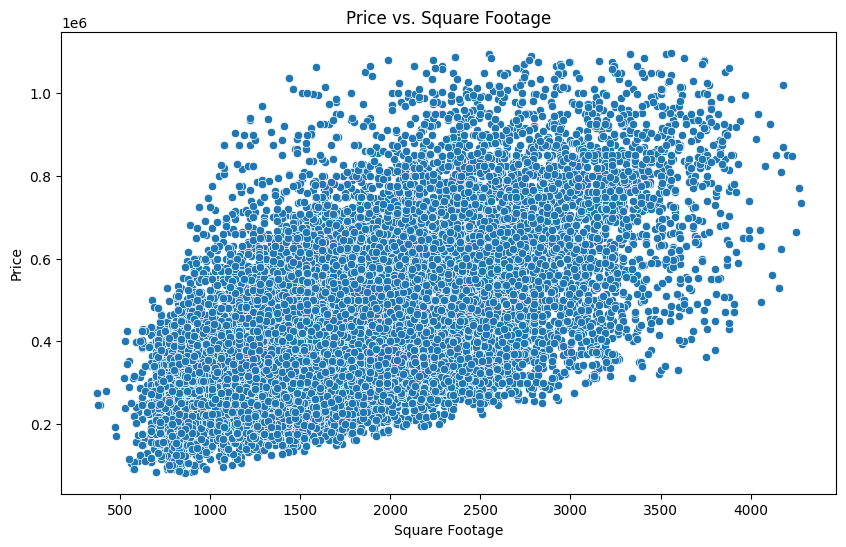

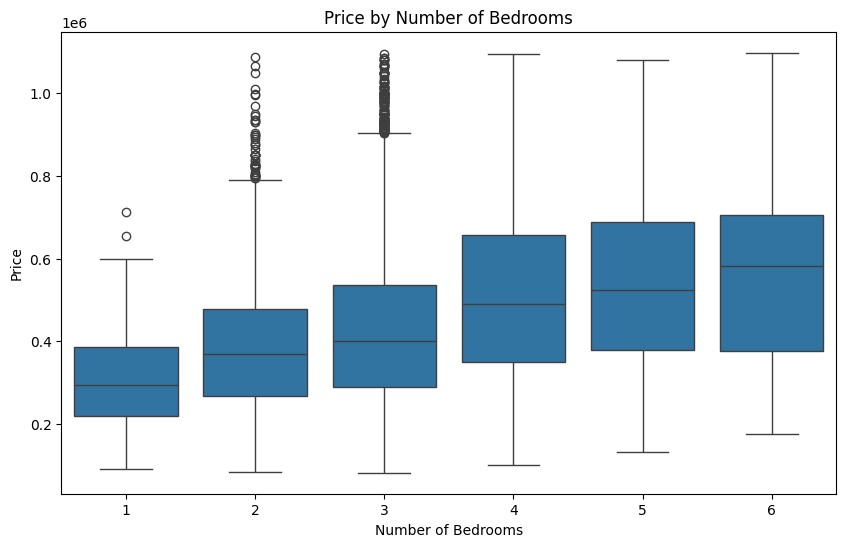

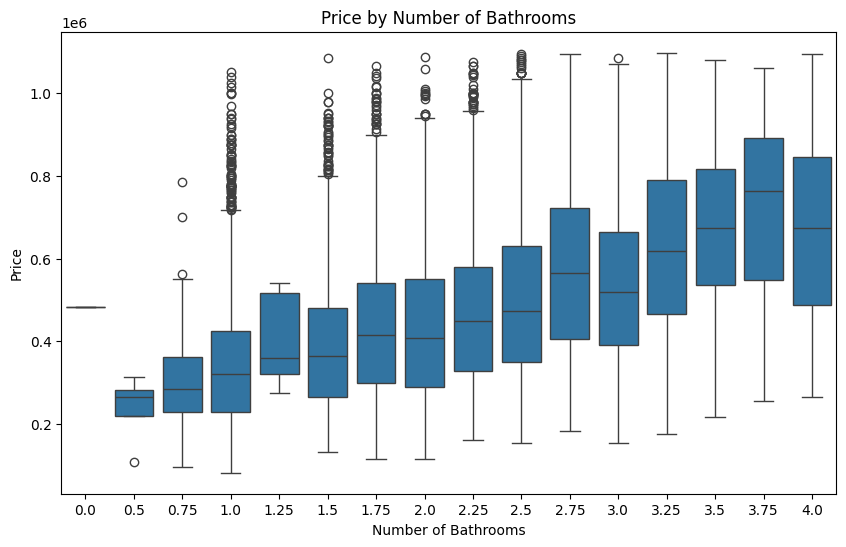

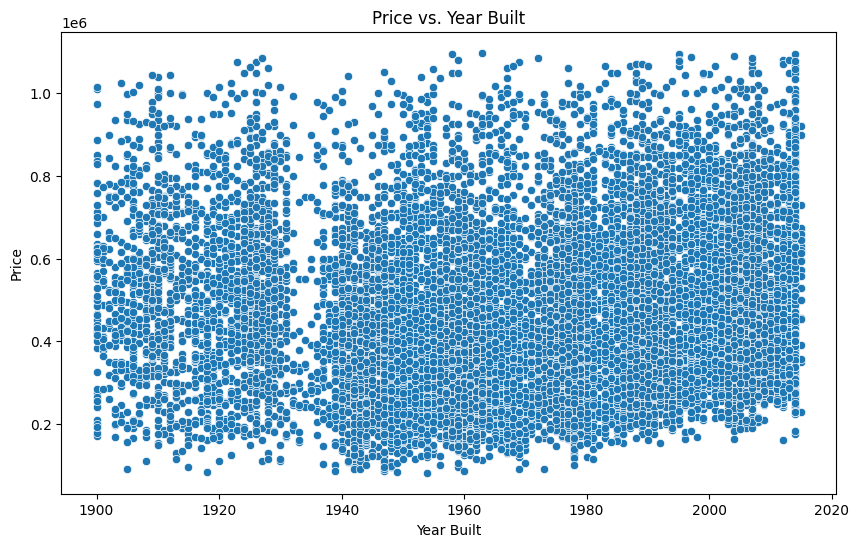

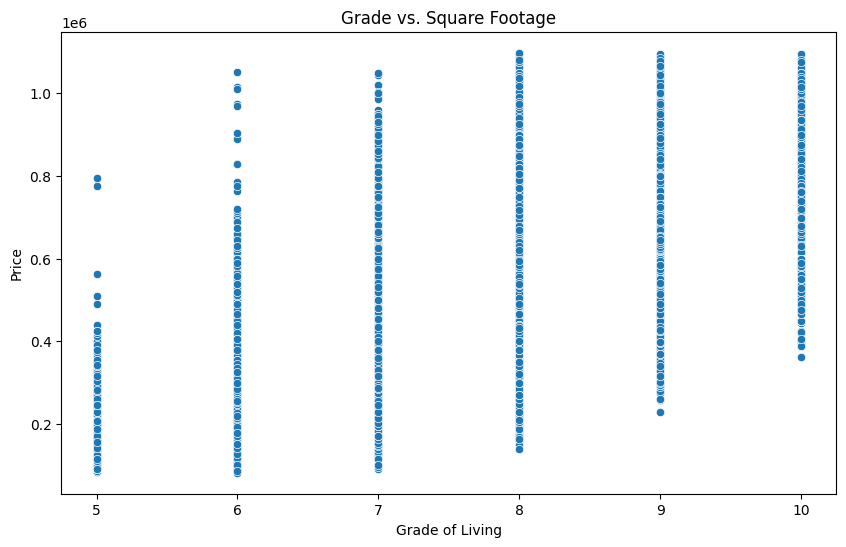

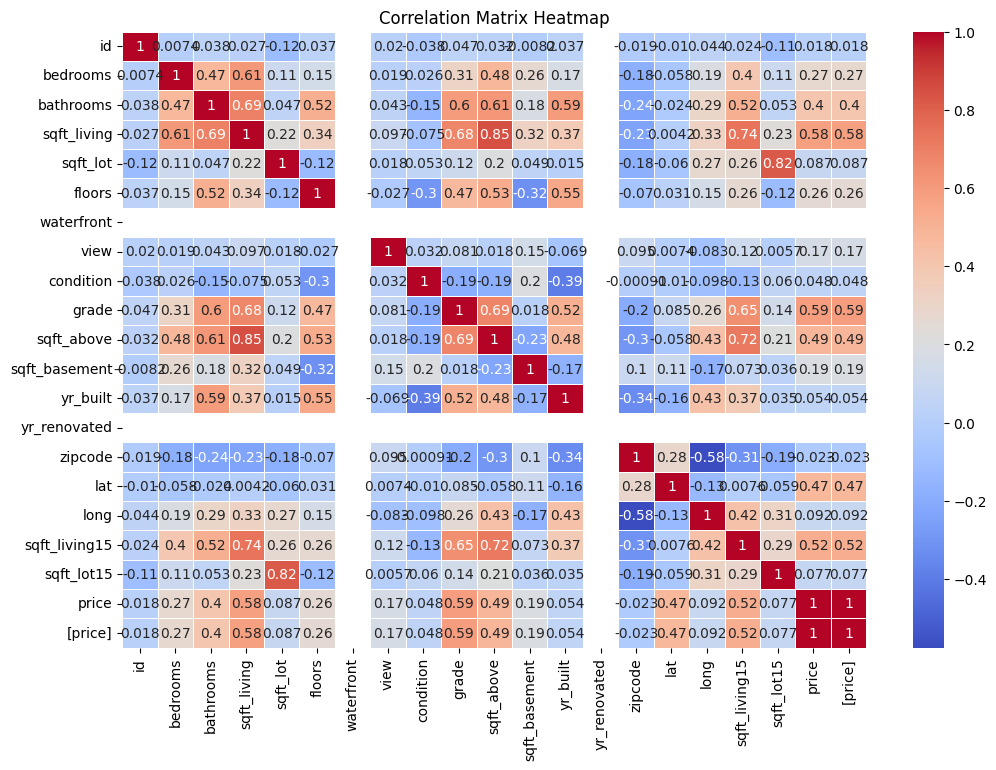

In [ ]:
!pip install xgboost scikit-learn==1.5.2 pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import drive

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv")

# Handle missing values in "yr_renovated"
df["yr_renovated"] = df["yr_renovated"].fillna(0)

# Example: Handling missing values and outliers
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())  # Fill missing values with median

# Identify and remove big outliers
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

# Example: Removing outliers using z-score
from scipy import stats
df = df[(np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Changing from scientific notation to float.
df['[price]'] = df['price'].astype(float)


# Scatter Plot of Price vs. Square Footage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

# Box Plot of Price by Number of Bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Box Plot of Price by Number of Bathrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='bathrooms', y='price', data=df)
plt.title('Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

# Scatter Plot of Price vs. Year Built
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yr_built', y='price', data=df)
plt.title('Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()

# Scatter Plot of Price vs. Square Footage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='grade', y='price', data=df)
plt.title('Grade vs. Square Footage')
plt.xlabel('Grade of Living')
plt.ylabel('Price')
plt.show()

# Heatmap of Correlation Matrix
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Custom formatter function to display 'M' for millions and 'K' for thousands
def custom_formatter(x, pos):
    if x >= 1_000_000:
        return f'${x*1e-6:.1f}M'  # Format as 'M' for millions
    elif x >= 1_000:
        return f'${x*1e-3:.1f}K'  # Format as 'K' for thousands
    else:
        return f'${x:.0f}'  # No formatting for smaller values



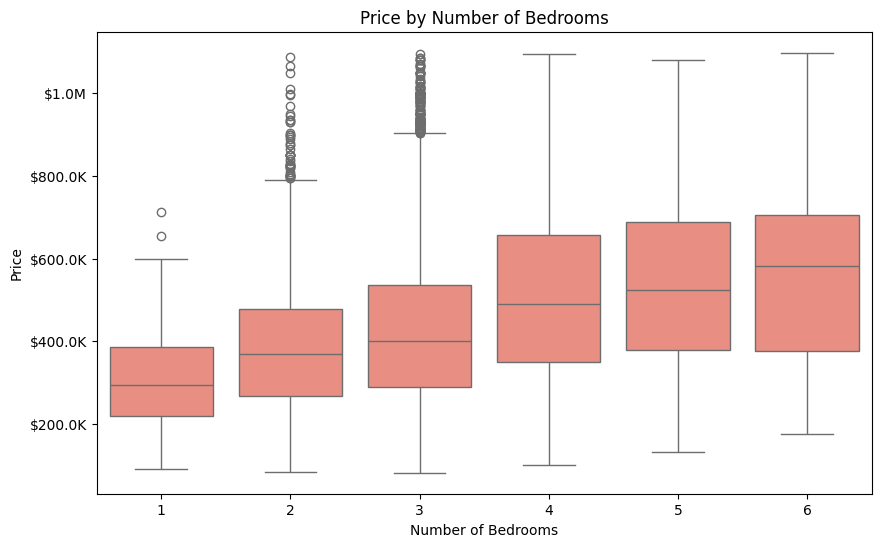

In [ ]:
import matplotlib.ticker as ticker

# Box Plot of Price by Number of Bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df, color="salmon")

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
# ax.yaxis.set_tick_params( labelleft=False, labelright=True)
# This code isn't working


plt.title('Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()


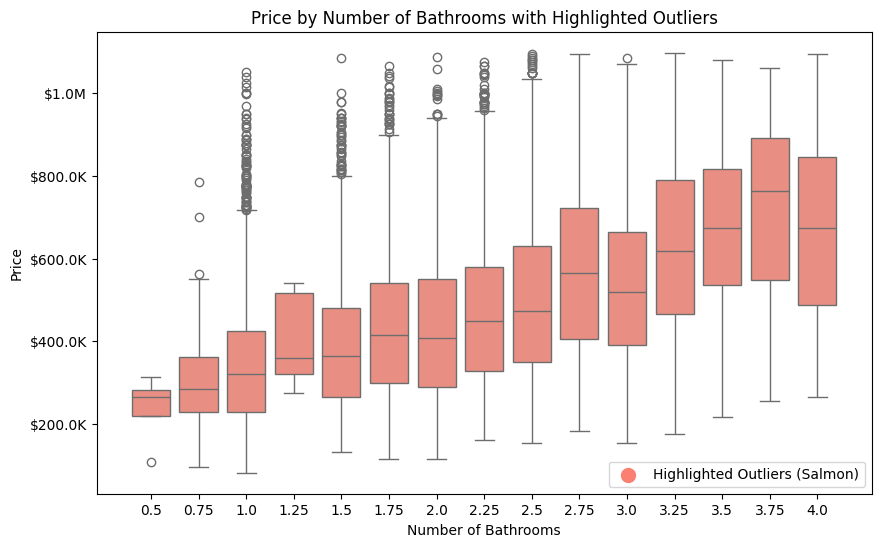

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

# Filter out rows where bathrooms <= 0
df_filtered = df[df['bathrooms'] > 0]

# Calculate the IQR (Interquartile Range) for the 'bathrooms' column
Q1 = df_filtered['bathrooms'].quantile(0.25)
Q3 = df_filtered['bathrooms'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
outliers = df_filtered[(df_filtered['bathrooms'] < lower_bound) | (df_filtered['bathrooms'] > upper_bound)]

# Check if there are enough outliers, and select a random sample if possible
num_random_outliers = min(5, len(outliers))  # Ensure we don't try to sample more than available outliers

# Randomly select a few outliers (let's say 5 outliers to highlight in bold)
random_outliers = outliers.sample(n=num_random_outliers, random_state=42)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='bathrooms', y='price', data=df_filtered, color="salmon")

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))

# Plot the random outliers in black (bolded)
plt.scatter(random_outliers['bathrooms'], random_outliers['price'], color='salmon', marker='o', s=100, label='Highlighted Outliers (Salmon)')

# # Plot the remaining outliers in salmon
# remaining_outliers = outliers[~outliers.index.isin(random_outliers.index)]
# plt.scatter(remaining_outliers['bathrooms'], remaining_outliers['price'], color='salmon', marker='o', s=100, label='Other Outliers (Salmon)')

# Add labels and title
plt.title('Price by Number of Bathrooms with Highlighted Outliers')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')

# Show the plot with the legend
plt.legend()
plt.show()


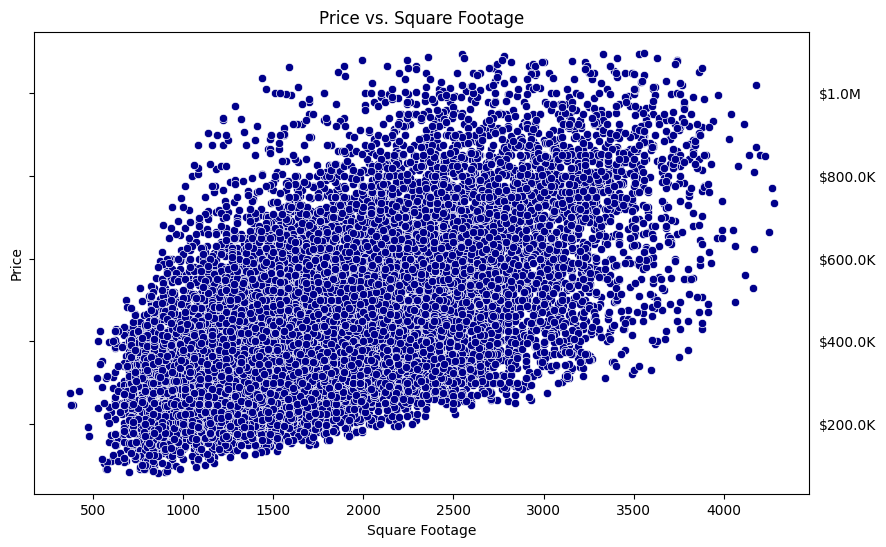

In [ ]:
# Scatter Plot of Price vs. Square Footage with Custom y-axis Formatting
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='sqft_living', y='price', data=df, color="darkblue")

# Apply the custom formatter to the y-axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
ax.yaxis.set_tick_params(which='major', labelleft=False, labelright=True)


plt.title('Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

[ 8  7  9  6  5 10]


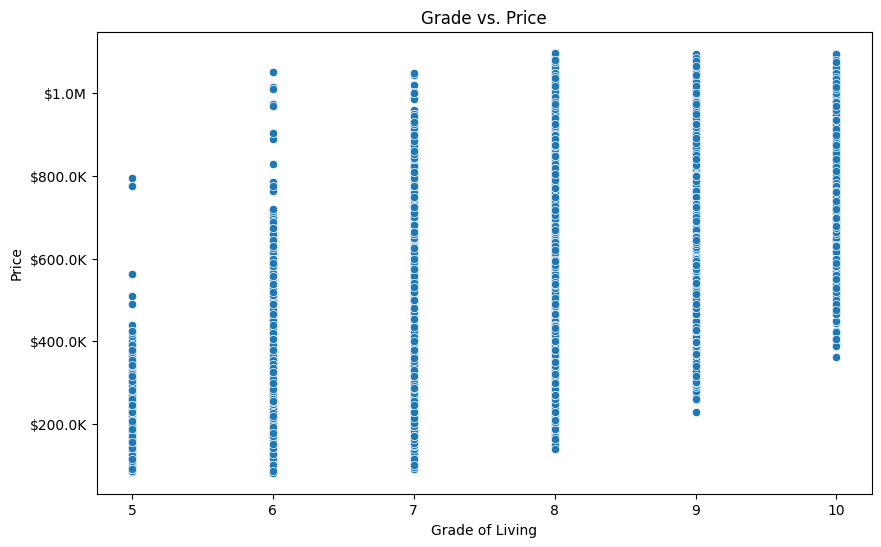

In [ ]:
# Grade:
# Do plots based on the full data set?

import matplotlib.ticker as ticker

# Check the unique values of 'grade' to understand why it's showing 5-10
print(df['grade'].unique())

# Scatter Plot of Grade vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='grade', y='price', data=df)

# Custom formatter function to display 'M' for millions and 'K' for thousands
def custom_formatter(x, pos):
    if x >= 1_000_000:
        return f'${x*1e-6:.1f}M'  # Format as 'M' for millions
    elif x >= 1_000:
        return f'${x*1e-3:.1f}K'  # Format as 'K' for thousands
    else:
        return f'${x:.0f}'  # No formatting for smaller values

# Apply the custom formatter to the y-axis (price)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))

plt.title('Grade vs. Price')
plt.xlabel('Grade of Living')
plt.ylabel('Price')
plt.show()


<ipython-input-32-fbf0515378d7>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


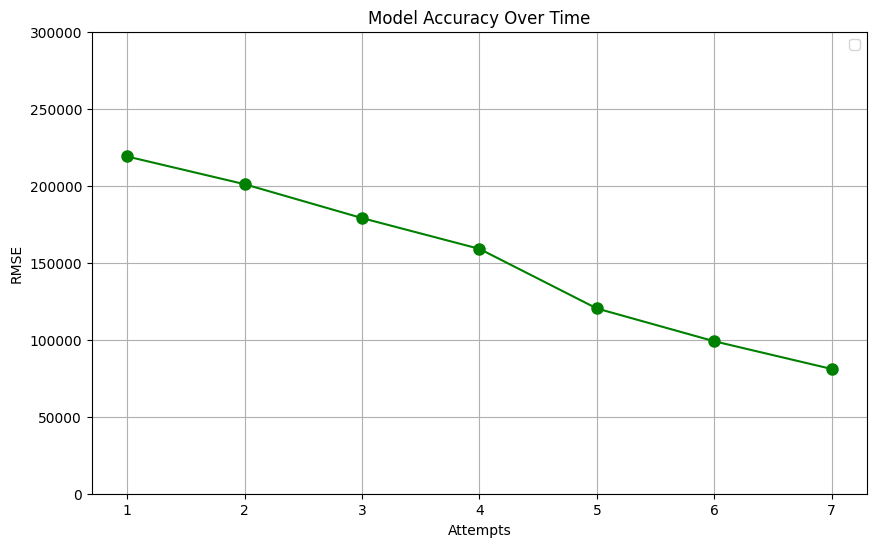

In [ ]:
import matplotlib.pyplot as plt

# Define the data: RMSE values (decreasing from 220k to 80k as per your request)
rmse_values = [219000, 201000, 179000, 159000, 120300, 99000, 81000]
attempts = range(1, 8)  # X-axis representing attempts (1 through 7)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(attempts, rmse_values, marker='o', color='green', linestyle='-', markersize=8,)
plt.ylim(0, 300000)


# Add labels and title
plt.title('Model Accuracy Over Time')
plt.xlabel('Attempts')
plt.ylabel('RMSE')
plt.xticks(attempts)  # Make sure x-axis shows integers from 1 to 7
plt.grid(True)

# Show the plot
plt.legend()
plt.show()
